# Plotting an Invariant Mass Histogram in R

This tutorial is meant to be run using [CMS Open Data](http://opendata.cern.ch/about/cms) available from the [CERN Open Data portal](http://opendata.cern.ch).
Please see the [README](https://github.com/cms-opendata-education/cms-rmaterial-multiple-languages/blob/master/README.md) for instructions on how to run this tutorial offline.

**N.B.**: Original text and code by [Edith Villegas Garcia](https://github.com/edithvillegas), with additions by [Andrew John Lowe](https://github.com/andrewjohnlowe). Edited and converted to this interactive notebook by [Achintya Rao](https://github.com/RaoOfPhysics).

---

If you're comfortable with R, [jump straight into the analysis of CMS Open Data](#Working-with-CMS-Open-Data). If not, let's start with a…

## Quick intro to R

R is a language used for statistics and data analysis. In this tutorial, we introduce data analysis in R using the CMS Open Data from 2011. At the end of this tutorial, you will know how to create histograms of invariant mass and identify the particles that appear in the histograms.

### Data types in R

There are different data types in R. Basic data types include the following:
- Logical
- Numeric
- Integer
- Complex
- Character

Variables  are  assigned  to  a  type  without  having  to  specify  it.  Numeric  variables  are  simply numbers. Integer variables are specified by adding an “L” at the end of the number. Go ahead, execute the code in the following cell by clicking on it and then selecting "Run" from the menu above or by clicking on it and hitting `Shift`+`Enter`:

In [1]:
a <- 5L

Complex variables are complex numbers, they can be declared using the following format:

In [2]:
b <- 5 + 3i
d <- 8 + 0i

Logical variables can have values of either TRUE or FALSE. You can also assign a condition to a logical variable:

In [3]:
c <- 3 > 5

Character variables are either letters or phrases, you can also add numbers and symbols between quotation marks.

In [4]:
cr <- "3!"

#### Vectors

Variables can be either scalar or vector. A scalar vector is a variable that contains a Vectors can contain more than one value, and are created in the following form:

In [5]:
a <- c(2, 3, 5)

Vectors can be any of the basic data types that we mentioned before. We can also apply conditions to vectors to create a logical vector, using the following conditions:

In [6]:
a <- c(2, 5, 8, 3, 9)
b <- a > 3

We can create a vector with these values:
`FALSE TRUE TRUE FALSE TRUE`

In [7]:
b

[1] FALSE  TRUE  TRUE FALSE  TRUE

To access a particular element of the vector (vector indexing) we can use the name of the vector and the number of the element in brackets, counting from 1. The following command will produce the output corresponding to the first element in the vector `a` we defined:

In [8]:
a[1]

[1] 2

We can also do logical indexing, apply a condition so that only the elements of the vector that meet the condition are shown:

In [9]:
a[a>3]

[1] 5 8 9

#### Matrices

In R, we can create a matrix from a vector. Matrices are two-dimensional data structures. The way we create a matrix is by specifying the values it will contain, the number of rows and number of columns and if we are going to fill the matrix by column or by row. The following command creates a vector with values from 1 to 9.

In [10]:
a <- c(1:9)

In [11]:
A <- matrix(a, nrow=3, ncol=3, byrow=TRUE)

A

1,2,3
4,5,6
7,8,9


To  access  some  element  of  a  matrix  we  have  to specify  the  row  and  column  values  in  brackets 
after the matrix name. The following command, for example, gives the value 6, which is in the second row and the third column.

In [12]:
A[2,3]

[1] 6

We can access the values of a whole column at once, by leaving and empty space where the row number would be, and vice
versa. A[2,] gives the values of the second row. Matrices can also be created using conditions for other matrices, and can also be indexed logical. Indexing  a  matrix  logical  gives  as  a  result  a  vector  with  the  values  of  the  matrix  for  which  the condition is true.

In [13]:
# Create a vector with values from 1 to 25
a <- c(1:25)

# Create a matrix from vector a, with 5 rows and 5 columns, and fill it by row.
A <- matrix(a, nrow=5, ncol=5, byrow=TRUE)

# Create a logical matrix from a condition.
C <- A > 12

In [14]:
# Show the logical matrix: the values are true when the 
# corresponding elements of matrix A meet the condition "A>12".

C

FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE


In [15]:
# Indexing matrix A using matrix C, this gives of us the values  
# of A for which the corresponding values of C are TRUE.
# That is, the values for which "A>12", in the form of a vector.

A[C]

[1] 16 21 17 22 13 18 23 14 19 24 15 20 25

#### Arrays

Arrays are data structures similar to matrices, but they can have more than two dimensions. You can create them from a vector and specify the number of dimensions of the array.

In [16]:
# NOTE: For some reason, arrays don't display correctly in Jupyter notebooks.
# See below for correct output.

# Create a vector with values from 1 to 27
a <- c(1:27)

# Create an array from vector a, that has 3 matrices of dimension 3x3.
A <- array(a, dim=c(3,3,3))

# Show the array.
print(A)

, , 1

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9

, , 2

     [,1] [,2] [,3]
[1,]   10   13   16
[2,]   11   14   17
[3,]   12   15   18

, , 3

     [,1] [,2] [,3]
[1,]   19   22   25
[2,]   20   23   26
[3,]   21   24   27



#### Lists

Lists are like vectors, but they can contain different data types at the same time, and they can also contain vectors. 

In [17]:
l <- list(c(1,2,3),'a', 1, 1+5i)

l

[[1]]
[1] 1 2 3

[[2]]
[1] "a"

[[3]]
[1] 1

[[4]]
[1] 1+5i

#### Data Frames

Data  frames  are  like  lists  of  vectors  that  have  the  same  length.  They  are  used  to  store  data  in  a tabular form. You can create data frames using the following:

In [18]:
data <- data.frame(
    Name = c("James", "David"),
    Gender = c('M','M'),
    Age = c(20, 23)
)

data

Name,Gender,Age
<fct>,<fct>,<dbl>
James,M,20
David,M,23


If  you want to access a particular column of data of a data frame,  you use the name of the data frame followed by a $ and the name of the column. In the previous example, if we want to access the names, we can write the following, which will return a vector with the names written on it: 

In [19]:
data$Name

[1] James David
Levels: David James

If we want, on the other hand, access only a particular row, we can use the following, which will give the first row of the data frame:

In [20]:
data[1,]

Name,Gender,Age
<fct>,<fct>,<dbl>
James,M,20


You can also import previously created data from other files, like CSV files, as we will see below.

## Working with CMS Open Data

This example uses "base R" without installing or calling any additional packages.
It serves a didactic role in explaining how R _can_ be used for playing with CMS data, introducing the reader to concepts of particle physics and demonstrates what steps are taken for performing a simple analysis.
If, however, you are familiar with both R and particle physics and want to analyse these data using the `tidyverse` package, [skip right to the end](#Using-Tidyverse).

---

### Importing Data from CSV files

You can import files in the CSV (comma-separated values) format to R, and analyse the data contained in them. In  this  tutorial we are going to use CMS Open Data as an example.

The data files for this example can be found here: [http://opendata.cern.ch/record/545](http://opendata.cern.ch/record/545)

To import the data files in R we use the following command:

In [21]:
jpsi <- read.csv("http://opendata.cern.ch/record/545/files/Jpsimumu.csv")

Here we are saving the data contained in the `Jpsimumu.csv` file in a variable called `data`. The data files contain thousands of entries, so instead of showing the whole file,  we can take a peek using the following function, which will show the first 6 rows of the data frame:

In [22]:
head(jpsi)

Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
165617,75206813,G,10.1623,0.4763,-8.5164,5.5231,8.5297,0.6091,-1.5149,-1,G,19.7754,2.7508,-13.9871,13.7059,14.2550,0.8539,-1.3766,1
165617,75678475,G,15.8799,15.0618,-1.6658,-4.7464,15.1536,-0.3083,-0.1102,1,G,11.9338,11.9084,-0.7670,-0.0851,11.9330,-0.0071,-0.0643,-1
165617,74428554,G,21.8279,-6.2214,11.0845,17.7447,12.7111,1.1357,2.0823,-1,G,36.6513,-10.6874,15.0692,31.6544,18.4743,1.3076,2.1877,1
165617,75193169,G,19.4923,2.7612,-5.5769,-18.4719,6.2230,-1.8084,-1.1111,1,G,14.9334,1.5525,-6.1254,-13.5302,6.3190,-1.5050,-1.3226,-1
165617,74832715,G,8.0972,4.6127,-1.8389,6.3949,4.9657,1.0710,-0.3793,-1,T,3.5131,-0.5305,0.6880,3.4024,0.8688,2.0742,2.2276,1
165617,74981507,G,30.5862,15.5218,5.1293,-25.8509,16.3474,-1.2391,0.3192,1,G,12.4868,7.7640,1.0425,-9.7233,7.8337,-1.0421,0.1335,-1


### Calculating the Invariant Mass

We are going to use the data stored in `jpsi`, which came from `Jpsimumu.csv`. The CSV file contains events from the CMS detector where two muons were detected.

You can see from `head(jpsi)` that there are values shown for the energy (E), the momentum (px, py, pz), the pseudo-rapidity (eta or η) and the angle (phi or φ). The value for the mass is not shown, but we can calculate it from the values of the energy and the momentum.

The invariant mass can be calculated with the following equation:

$M = \sqrt{(\sum{E})^2 - ||\sum{p}||^2}$

where $M$ is the invariant mass, $\sum{E}$ is the total energy, and $\sum{p}$ is the total momentum. To calculate the invariant mass in the code, we are going to use the values of px, py and pz and the values of the energy for the two particles. First, we are going to calculate the vector sum of the momentum of particles 1 and 2. To calculate the vector sum, we have to individually sum each component of the vectors:

In [23]:
pxt <- jpsi$px1+jpsi$px2
pyt <- jpsi$py1+jpsi$py2
pzt <- jpsi$pz1+jpsi$pz2

Then we calculate the magnitude of the vector, with the following:

In [24]:
# Here we use the function sqrt() to obtain the square root of 
#the sum of all momentum components squared, and save it to the 
# variable ptotal

ptotal <- sqrt(pxt^2+pyt^2+pzt^2)

We can also define a function to do this calculation. You can define your own functions using the 
following syntax:

```
myfunctionname = function(arg1, arg2...)
{
statements
return(a) 
}
```

To define a function to calculate the magnitude of a vector, we need to take three arguments and return one value. We can call this function `magnitude()` and define it like this:

In [25]:
magnitude = function(x, y, z) {
    m = sqrt(x^2 + y^2 + z^2)
    return(m)
}

Now to do the calculation using the function we simply pass the arguments, which are the three components of the momentum in the different spatial directions:

In [26]:
ptotal <- magnitude(pxt, pyt, pzt)

We can also define a function to do the calculation of the invariant mass of a system consisting of 
two particles:

In [27]:
invmass = function(px1, px2, py1, py2, pz1, pz2, E1, E2){
    px = px1+px2
    py = py1+py2
    pz = pz1+pz2
    E = E1+E2
    ptotal = magnitude(px, py, pz)
    mass = sqrt(E^2 - ptotal^2)
    return(mass)
}

# Here we first indicate the name of the function and its arguments, 
# then we obtain the sum of p1 and p2 for each individual component, 
# and we do the sum of the energies, then we obtain the magnitude 
# of the total momentum and finally we calculate the invariant mass 
# using the previously stated equation. 

We can now calculate the invariant mass value using the function we have just defined and view the first values using `head()`:

In [28]:
jpsimass = invmass(jpsi$px1, jpsi$px2, jpsi$py1, jpsi$py2, 
                   jpsi$pz1, jpsi$pz2, jpsi$E1, jpsi$E2)

head(jpsimass)

[1] 3.112837 4.116833 3.101969 2.332934 4.563228 3.072463

### Plotting a Histogram

Now that we have the values for the invariant mass, we can plot a histogram to see all the data. We can do this in R with the function hist( ):

In [44]:
library(repr)
options(repr.plot.width=6,repr.plot.height=4 )

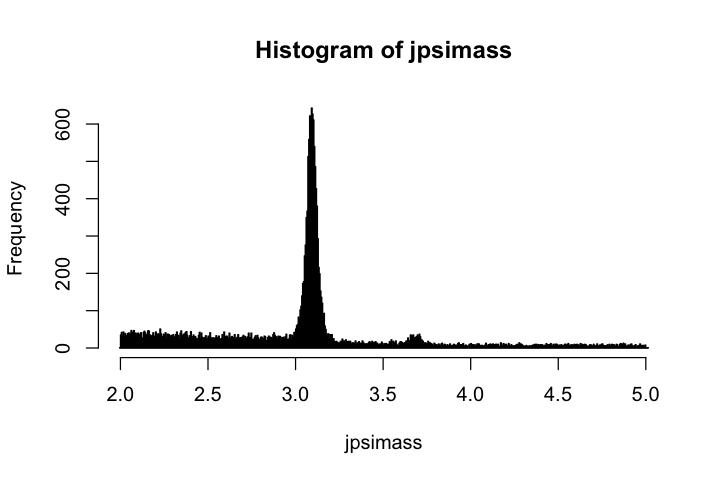

In [45]:
hist(jpsimass, breaks = 500)

# Here, “breaks” indicates the numberof bins. You can experiment 
# changing this number to see how you can better visualise the data.

We  can change  the  colours  and  title  of  the  histogram  with  different  commands. Try the  following 
command:

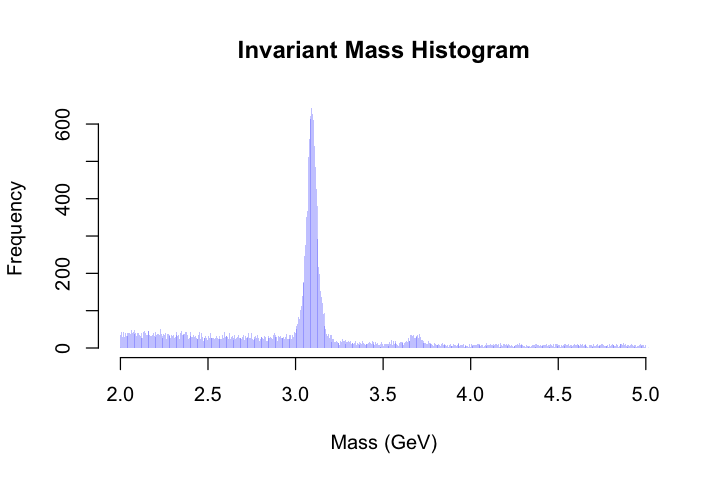

In [46]:
hist(jpsimass, breaks = 500, xlab = "Mass (GeV)", lty="blank", 
     col=rgb(0,0,1,1/4), main="Invariant Mass Histogram")

# Here ‘xlab’ is the title for the x axis, lty="blank" indicates 
# that there’s no border for the bins in the histogram, ‘main’ is 
# the title for the histogram and ‘col’ indicates the colour (the 
# numbers are the values for the red, green, blue and alpha channels).

Now in the histogram you can clearly see a very big peak around 3.1 GeV and a smaller peak around 3.7 GeV. These two peaks correspond to the mass of two particles that have di-muon decay (decay into a muon and an anti-muon). If we look in the [Particle Data Group database](http://pdg.lbl.gov/), we find that these two particles are mesons: the 
J/ψ(1S) meson and the ψ(2S) meson, respectively (although the name of the file -- `Jpsimumu.csv` -- should've given you a clue).

You can explore the rest of the files and try to identify the particles that appear in each histogram. To identify the particles, you can take into account the mass and the decay mode and search in the Particle Data Group database.

## Using Tidyverse

The above example of analysis of CMS Open Data uses the so-called "base R" software without calling any external packages.
However, the [`tidyverse`](https://www.tidyverse.org/) package (which is really a collection of a family of related packages) greatly simplifies both the manipulation/analysis of data and its visualisation.
It is fast becoming a standard in the world of data science, and there are good reasons to [teach tidyverse to beginners](http://varianceexplained.org/r/teach-tidyverse/) (see issue [\#3](https://github.com/cms-opendata-education/cms-rmaterial-multiple-languages/issues/3)).

So, we thought we could demonstrate the above analysis of CMS Open Data using the `tidyverse` package not only to show you how you can simplify and steamline your code but also to make your explorations with CMS Open Data using R a little more enjoyable.

You can condense the whole process of importating the data, manipulating the variables in the dataset and visualising the contents in the form of a plot using a single, relatively small code chunk (see explanation below):

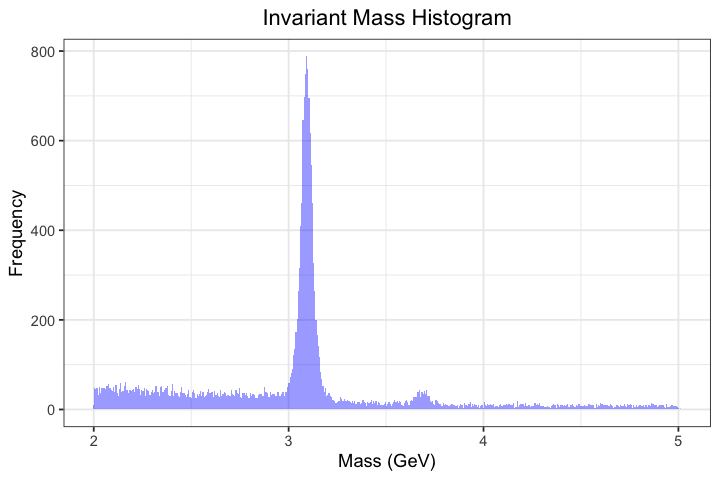

In [47]:
suppressMessages(require(tidyverse))

read_csv("http://opendata.cern.ch/record/545/files/Jpsimumu.csv", 
         col_types = cols()) %>% 
  mutate(ptotal = sqrt((px1+px2)^2 + (py1+py2)^2 + (pz1+pz2)^2), 
         E = E1+E2, 
         mass = sqrt(E^2 - ptotal^2)) %>% 
  ggplot(aes(mass)) + 
  geom_histogram(bins = 500, fill = "blue", alpha = 0.4) + 
  xlab("Mass (GeV)") + 
  ylab("Frequency") + 
  ggtitle("Invariant Mass Histogram") + 
  theme_bw() + 
  theme(plot.title = element_text(hjust = 0.5))

So what did we just do here?
Let us take a look at the code line-by-line:

The first line of the code chunk merely calls the `tidyverse` package, with the command `require(tidyverse)`.

However, when a package is loaded, it usually announces this fact by listing some information, including potential conflicts with functions from base R or other packages.
We can suppress these messages with `suppressMessages()`, without which you might see something like this:

```R
Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.3.4     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
```

Now, the next part of the code can be treated as a single sentence: "**Read** this file, THEN **mutate** its contents to create new variables including `mass`, THEN **plot** `mass` with some specified parameters."

Essentially, these are the main functions you're using (along with the "piping" operator `%>%`):

|Function 1|   |Function 2||Function 3|
|:--|:--|:--|:--|:--|
|**Read** this file|THEN|**mutate** its contents|THEN|**plot** it.|
|`read_csv()`|`%>%`|`mutate()`|`%>%`|`ggplot()`|

- `read_csv()` comes from the `readr` package, and takes two arguments here:
    1. The CSV file that needs to be read, and
    1. an optional argument for suppressing the column specification based on the headers in the CSV file.



In [32]:
# Read the CSV file and assign its contents to a data frame `jpsi`:
jpsi <- read_csv("http://opendata.cern.ch/record/545/files/Jpsimumu.csv")

# Now display the contents of this data frame:
jpsi

Parsed with column specification:
cols(
  .default = col_double(),
  type1 = col_character(),
  type2 = col_character()
)
See spec(...) for full column specifications.


Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
165617,75206813,G,10.1623,0.4763,-8.5164,5.5231,8.5297,0.6091,-1.5149,-1,G,19.7754,2.7508,-13.9871,13.7059,14.2550,0.8539,-1.3766,1
165617,75678475,G,15.8799,15.0618,-1.6658,-4.7464,15.1536,-0.3083,-0.1102,1,G,11.9338,11.9084,-0.7670,-0.0851,11.9330,-0.0071,-0.0643,-1
165617,74428554,G,21.8279,-6.2214,11.0845,17.7447,12.7111,1.1357,2.0823,-1,G,36.6513,-10.6874,15.0692,31.6544,18.4743,1.3076,2.1877,1
165617,75193169,G,19.4923,2.7612,-5.5769,-18.4719,6.2230,-1.8084,-1.1111,1,G,14.9334,1.5525,-6.1254,-13.5302,6.3190,-1.5050,-1.3226,-1
165617,74832715,G,8.0972,4.6127,-1.8389,6.3949,4.9657,1.0710,-0.3793,-1,T,3.5131,-0.5305,0.6880,3.4024,0.8688,2.0742,2.2276,1
165617,74981507,G,30.5862,15.5218,5.1293,-25.8509,16.3474,-1.2391,0.3192,1,G,12.4868,7.7640,1.0425,-9.7233,7.8337,-1.0421,0.1335,-1
165617,75612982,G,7.5544,1.2913,-5.3588,-5.1646,5.5122,-0.8361,-1.3343,-1,T,3.8416,-0.9896,-3.4548,-1.3534,3.5938,-0.3682,-1.8498,1
165617,74760204,G,24.6376,9.9836,19.1426,-11.8697,21.5896,-0.5253,1.0901,1,G,11.0213,3.3785,7.8272,-6.9841,8.5252,-0.7476,1.1633,-1
165617,75017052,G,22.5057,5.6296,-9.9497,19.3857,11.4319,1.2987,-1.0559,1,G,30.5709,4.9468,-13.6360,26.9102,14.5055,1.3769,-1.2228,-1


If you "pipe" the output of this command using the `%>%` operator from the `magrittr` package, you can perform some action on the contents of the data frame, such as "mutating" it to create new variables:

- `mutate()` comes from the `dplyr` package, and creates three new variables here:
    1. `ptotal` is the total momentum for each &mu;&mu; candidate,
    1. `E` is the total energy for each candidate, and
    1. `mass` is the invariant mass of each candidate, calculated from `ptotal` and `E`.



In [33]:
# Overwrite the original data frame with the "mutated" version
jpsi <- jpsi %>% 
  mutate(ptotal = sqrt((px1+px2)^2 + (py1+py2)^2 + (pz1+pz2)^2), 
         E = E1+E2, 
         mass = sqrt(E^2 - ptotal^2))

# Display the updated data frame and scroll to the extreme right
# to see our new variables:
jpsi

Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,px2,py2,pz2,pt2,eta2,phi2,Q2,ptotal,E,mass
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
165617,75206813,G,10.1623,0.4763,-8.5164,5.5231,8.5297,0.6091,-1.5149,...,2.7508,-13.9871,13.7059,14.2550,0.8539,-1.3766,1,29.775428,29.9377,3.112837
165617,75678475,G,15.8799,15.0618,-1.6658,-4.7464,15.1536,-0.3083,-0.1102,...,11.9084,-0.7670,-0.0851,11.9330,-0.0071,-0.0643,-1,27.507337,27.8137,4.116833
165617,74428554,G,21.8279,-6.2214,11.0845,17.7447,12.7111,1.1357,2.0823,...,-10.6874,15.0692,31.6544,18.4743,1.3076,2.1877,1,58.396872,58.4792,3.101969
165617,75193169,G,19.4923,2.7612,-5.5769,-18.4719,6.2230,-1.8084,-1.1111,...,1.5525,-6.1254,-13.5302,6.3190,-1.5050,-1.3226,-1,34.346561,34.4257,2.332934
165617,74832715,G,8.0972,4.6127,-1.8389,6.3949,4.9657,1.0710,-0.3793,...,-0.5305,0.6880,3.4024,0.8688,2.0742,2.2276,1,10.675955,11.6103,4.563228
165617,74981507,G,30.5862,15.5218,5.1293,-25.8509,16.3474,-1.2391,0.3192,...,7.7640,1.0425,-9.7233,7.8337,-1.0421,0.1335,-1,42.963279,43.0730,3.072463
165617,75612982,G,7.5544,1.2913,-5.3588,-5.1646,5.5122,-0.8361,-1.3343,...,-0.9896,-3.4548,-1.3534,3.5938,-0.3682,-1.8498,1,10.966079,11.3960,3.100633
165617,74760204,G,24.6376,9.9836,19.1426,-11.8697,21.5896,-0.5253,1.0901,...,3.3785,7.8272,-6.9841,8.5252,-0.7476,1.1633,-1,35.515934,35.6589,3.189913
165617,75017052,G,22.5057,5.6296,-9.9497,19.3857,11.4319,1.2987,-1.0559,...,4.9468,-13.6360,26.9102,14.5055,1.3769,-1.2228,-1,53.023163,53.0766,2.381098


Instead of displaying it like this, we can "pipe" the new data frame to our plotting function:

- `ggplot()` comes from the `ggplot2` package, and works on the principle of layers:
    1. `aes(mass)` tells it we want to use the `mass` variable we've just created,
    1. `geom_histogram()` tells it to take this variable and draw its histogram with the specified bins and colours,
    1. `xlab()` and `ylab()` provides the labels,
    1. `ggtitle()` specifies the title,
    1. `theme_bw()` choses the black-and-white theme, and
    1. `theme()` allows you to manipulate elements of the plot individually.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


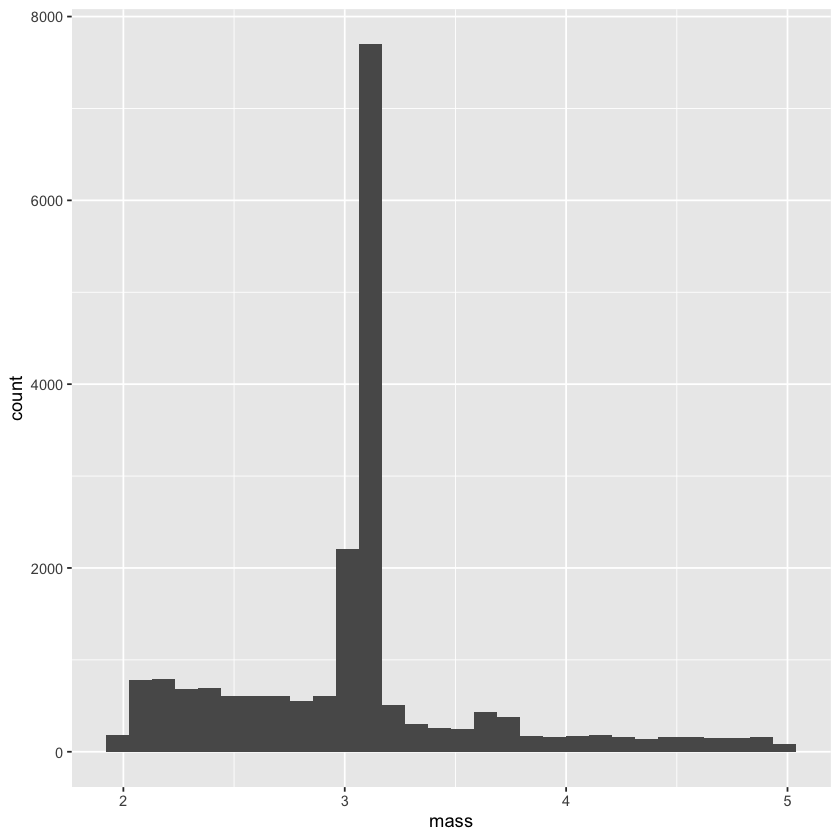

In [34]:
# Plot the variable `mass` from the data frame `jpsi` with default values
jpsi %>% 
  ggplot(aes(mass)) + 
  geom_histogram()

But thanks to the `%>%` operator, we don't have to create a named variable ("`jpsi`") and keep overwriting it manually.
We can chain the various outputs through "piping", and give `ggplot` some nice tweaks, as we saw above:

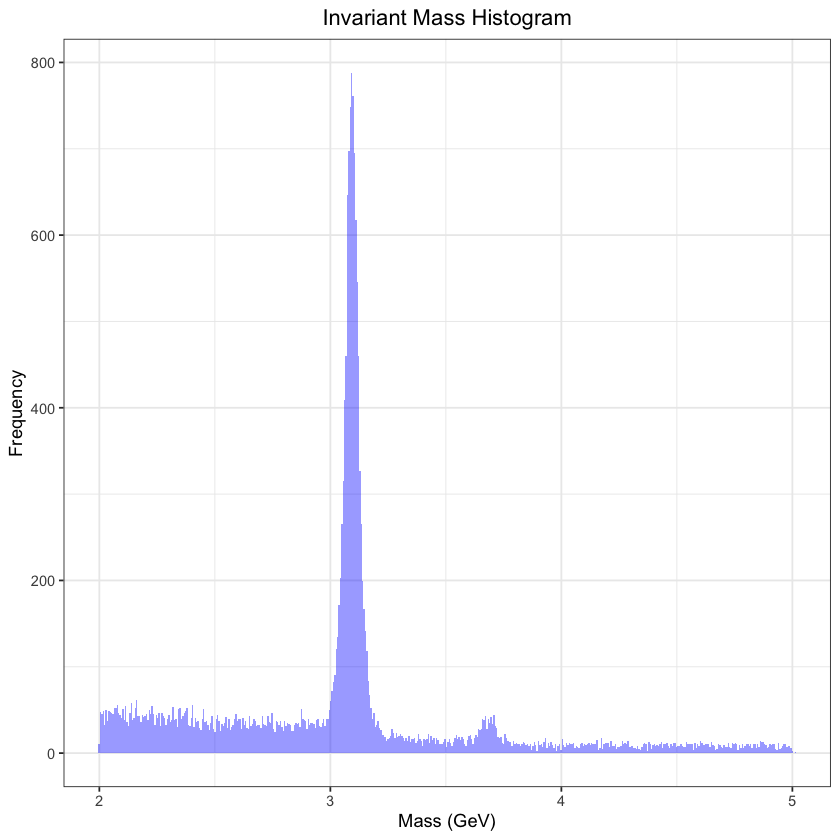

In [35]:
read_csv("http://opendata.cern.ch/record/545/files/Jpsimumu.csv", 
         col_types = cols()) %>% 
  mutate(ptotal = sqrt((px1+px2)^2 + (py1+py2)^2 + (pz1+pz2)^2), 
         E = E1+E2, 
         mass = sqrt(E^2 - ptotal^2)) %>% 
  ggplot(aes(mass)) + 
  geom_histogram(bins = 500, fill = "blue", alpha = 0.4) + 
  xlab("Mass (GeV)") + 
  ylab("Frequency") + 
  ggtitle("Invariant Mass Histogram") + 
  theme_bw() + 
  theme(plot.title = element_text(hjust = 0.5))

We hope you enjoyed this tutorial.
Good luck with exploring CMS Open Data using R!

# Fit a function to the J/$\psi$ peak

It is also possible with R to fit a function to our distribution. First we need to compute the histogram frequencies. We can do that without having to display the histogram again with the following command:

In [37]:
jpsel <- jpsi%>% filter(mass>2 & mass < 5) 
a<-hist(jpsel$mass,breaks=250,plot=FALSE)

In [39]:
## here we create a new data frame with x column the bin centers and n column the counts in each bin
jpdf <-  data.frame(x=a$mids, n=a$counts) 
print(head(jpdf))

      x  n
1 2.005 77
2 2.015 73
3 2.025 69
4 2.035 65
5 2.045 79
6 2.055 77


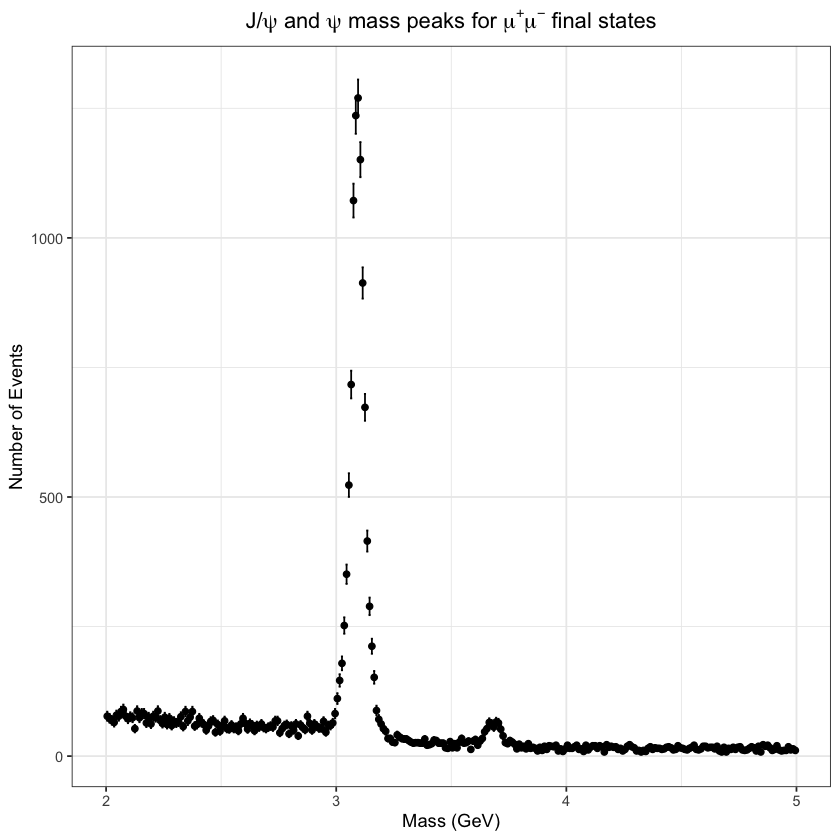

In [43]:
library(latex2exp)
jpdf %>%
   ggplot(aes(x,n, ymin=n-sqrt(n),ymax=n+sqrt(n))) + 
   geom_point() + 
   geom_errorbar() + 
   xlab("Mass (GeV)")+
   ylab("Number of Events")+
   ggtitle(TeX("J/$\\psi$ and $\\psi$ mass peaks for $\\mu^+\\mu^-$ final states"))+
   theme_bw() + theme(plot.title = element_text(hjust = 0.5))